In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = '/Volumes/USB20FD/Spring2017/Visualization/Project/Project_Data/2015_Street_Tree_Census_-_Tree_Data.csv'
fields = ['boroname']
df = pd.read_csv(path, usecols=fields)

In [3]:
df = df['boroname'].value_counts()

In [4]:
df

Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: boroname, dtype: int64

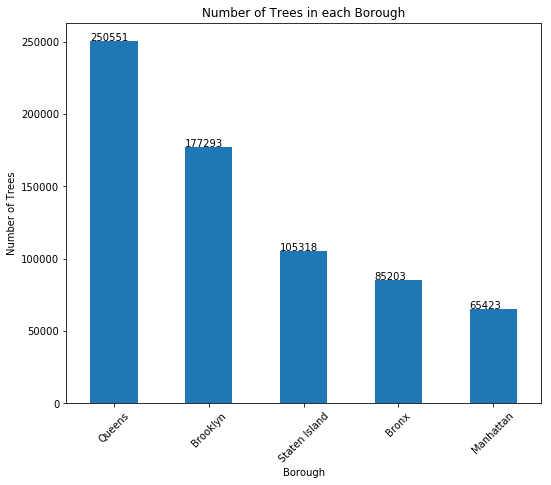

In [5]:
ax = df.plot(kind='bar', title="Number of Trees in each Borough", figsize=(8.5, 7))
ax.set_xlabel("Borough")
ax.set_ylabel("Number of Trees")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

In [6]:
df['Queens'] = df['Queens']/109
df['Brooklyn'] = df['Brooklyn']/71
df['Staten Island'] = df['Staten Island']/58.5
df['Manhattan'] = df['Manhattan']/22.83
df['Bronx'] = df['Bronx']/42

In [7]:
df

Queens           2298
Brooklyn         2497
Staten Island    1800
Bronx            2028
Manhattan        2865
Name: boroname, dtype: int64

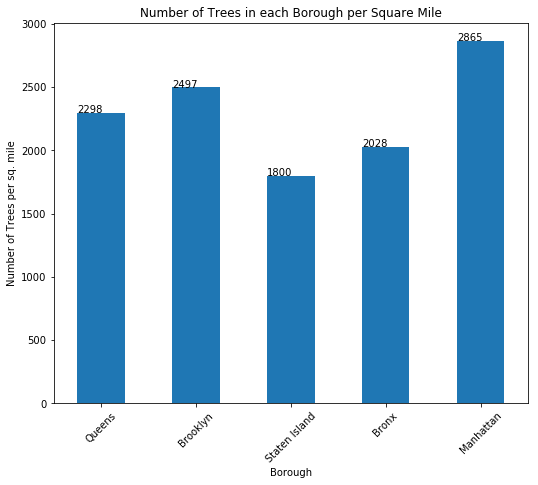

In [8]:
ax = df.plot(kind='bar', title="Number of Trees in each Borough per Square Mile", figsize=(8.5, 7))
ax.set_xlabel("Borough")
ax.set_ylabel("Number of Trees per sq. mile")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

In [9]:
import gmplot

In [10]:
df2 = pd.read_csv(path, usecols=['latitude', 'longitude'])
latitudes = df2.latitude.tolist()
longitudes = df2.longitude.tolist()

In [11]:
import gmplot

gmap = gmplot.GoogleMapPlotter.from_geocode("New York City")

gmap.scatter(latitudes[0:50], longitudes[0:50], 'red', size=40, marker=True)
gmap.draw("treemap.html")

In [37]:
import numpy as np
from scipy import stats

xmin, xmax = min(latitudes[0:400]), max(latitudes[0:400])
ymin, ymax = min(longitudes[0:400]), max(longitudes[0:400])

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([latitudes[0:400], longitudes[0:400]])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)


array([ 3.26907211,  3.65270645,  4.02205433,  4.36492231,  4.66913327,
        4.92329233,  5.1175935 ,  5.24457402,  5.29971308,  5.28178171,
        5.19288394,  5.03817834,  4.82532457,  4.56374624,  4.26382836,
        3.93616751,  3.59096742,  3.23762943,  2.88453933,  2.53901195,
        2.20733262,  1.89483184,  1.6059454 ,  1.34423643,  1.11238186,
        0.91214344,  0.74435086,  0.60892038,  0.50492105,  0.43068679,
        0.38396095,  0.36205413,  0.36199514,  0.38066019,  0.41487173,
        0.46146594,  0.51733301,  0.57943792,  0.64483025,  0.71065173,
        0.77414866,  0.83269573,  0.88383566,  0.9253372 ,  0.95527119,
        0.97210047,  0.97477557,  0.96282435,  0.93642158,  0.89642494,
        0.84436637,  0.7823939 ,  0.71316597,  0.63970782,  0.56524587,
        0.49303877,  0.42622372,  0.367692  ,  0.32000038,  0.28531651,
        0.26538833,  0.26152194,  0.27455134,  0.3047867 ,  0.35193637,
        0.41500856,  0.49221115,  0.58087773,  0.67745314,  0.77

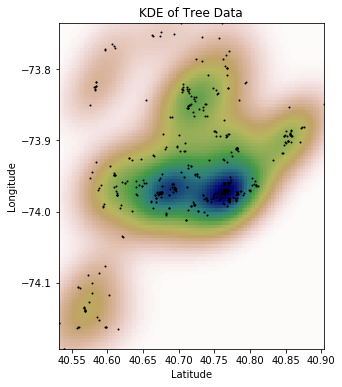

In [48]:
fig = plt.figure()
fig.set_size_inches(30, fig.get_figwidth(), forward=True)
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
ax.plot(latitudes[0:400], longitudes[0:400], 'k.', markersize=2)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_title("KDE of Tree Data")
plt.show()

In [50]:
df3 = pd.read_csv(path) 
df3

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260
5,190422,106099,08/30/2015,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,67,27,MN14,Lincoln Square,1014500,New York,40.770046,-73.984950,9.884187e+05,219825.5227
6,190426,106099,08/30/2015,11,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,67,27,MN14,Lincoln Square,1014500,New York,40.770210,-73.985338,9.883112e+05,219885.2785
7,208649,103940,09/07/2015,9,0,OnCurb,Alive,Good,Tilia americana,American linden,...,75,27,MN15,Clinton,1012700,New York,40.762724,-73.987297,9.877691e+05,217157.8561
8,209610,407443,09/08/2015,6,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,64,23,SI14,Grasmere-Arrochar-Ft. Wadsworth,5006400,New York,40.596579,-74.076255,9.630732e+05,156635.5542
9,192755,207508,08/31/2015,21,0,OffsetFromCurb,Alive,Fair,Platanus x acerifolia,London planetree,...,45,23,BK26,Gravesend,3037402,New York,40.586357,-73.969744,9.926537e+05,152903.6306


In [66]:
df3 = df3.loc[df3['zipcode'] == 11375]

In [67]:
zip_latitudes = df3.latitude.tolist()
zip_longitudes = df3.longitude.tolist()
len(zip_longitudes)

7059

In [68]:
xmin, xmax = min(zip_latitudes[0:400]), max(zip_latitudes[0:400])
ymin, ymax = min(zip_longitudes[0:400]), max(zip_longitudes[0:400])

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([zip_latitudes[0:400], zip_longitudes[0:400]])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

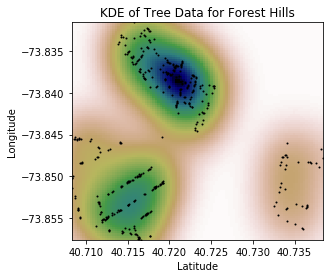

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
ax.plot(zip_latitudes[0:400], zip_longitudes[0:400], 'k.', markersize=2)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_title("KDE of Tree Data for Forest Hills")
plt.show()